In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
#Loading data
bankNote_data = pd.read_csv("BankNote_Authentication.csv") 

def splitDataTo_Train_Test(data, trainRatio):
    train = data.sample(frac = trainRatio)
    test = data.drop(train.index)
    x_train = train.iloc[:, 0:4]
    y_train = train.iloc[:, -1]
    x_test = test.iloc[:, 0:4]
    y_test = test.iloc[:, -1]
    return x_train, y_train , x_test , y_test


def calc_accuracy(y_predict, y_test):
    y_predict2 = np.array(y_predict)
    y_test2 = np.array(y_test)
    sum = 0
    for i in range(len(y_test2)):
        if y_predict2[i] == y_test2[i]:
            sum += 1
    return sum / len(y_predict2)


def experiment(data, ratio, iterations):
    accuracies = []
    depths = []
    counts = []
    for num in range(0, iterations):
        x_train, y_train, x_test, y_test = splitDataTo_Train_Test(data, ratio)

        tree = DecisionTreeClassifier(criterion = "entropy")
        tree.fit(x_train, y_train)
        
        depth = tree.tree_.max_depth
        depths.append(depth)
        
        count = tree.tree_.node_count
        counts.append(count)
        


        y_predict = tree.predict(x_test)
        accuracy = calc_accuracy(y_predict, y_test) * 100
        accuracies.append(accuracy)
     
    return accuracies, depths , counts

def measurements(data, ratio, iterations):
    accuracies, depths, counts = experiment(data, ratio, iterations)
    print("The experiment for 5 times at ratio:", ratio)  
    
    for num in range(0, iterations):
        print(num + 1 , "-> Tree Size:", depths[num] , " With Accuracy:", accuracies[num])

    print("Min Accuracy: ", np.min(accuracies), "\nMax Accuracy: ", np.max(accuracies), "\nMean Accuracy: " , np.mean(accuracies))
      
    print("Min Tree size: ", np.min(depths), "\nMax Tree size: ", np.max(depths), "\nMean Tree size: " , np.mean(depths), "\n")
    
#measurements(bankNote_data, 0.25, 5)
measurements(bankNote_data, 0.30, 5)
measurements(bankNote_data, 0.40, 5)
measurements(bankNote_data, 0.50, 5)
measurements(bankNote_data, 0.60, 5)
measurements(bankNote_data, 0.70, 5)


The experiment for 5 times at ratio: 0.3
1 -> Tree Size: 7  With Accuracy: 97.60416666666667
2 -> Tree Size: 8  With Accuracy: 97.5
3 -> Tree Size: 6  With Accuracy: 97.8125
4 -> Tree Size: 7  With Accuracy: 96.97916666666667
5 -> Tree Size: 6  With Accuracy: 96.14583333333333
Min Accuracy:  96.14583333333333 
Max Accuracy:  97.8125 
Mean Accuracy:  97.20833333333334
Min Tree size:  6 
Max Tree size:  8 
Mean Tree size:  6.8 

The experiment for 5 times at ratio: 0.4
1 -> Tree Size: 7  With Accuracy: 98.17739975698665
2 -> Tree Size: 7  With Accuracy: 98.78493317132441
3 -> Tree Size: 7  With Accuracy: 98.42041312272175
4 -> Tree Size: 7  With Accuracy: 97.93438639125152
5 -> Tree Size: 6  With Accuracy: 98.5419198055893
Min Accuracy:  97.93438639125152 
Max Accuracy:  98.78493317132441 
Mean Accuracy:  98.37181044957472
Min Tree size:  6 
Max Tree size:  7 
Mean Tree size:  6.8 

The experiment for 5 times at ratio: 0.5
1 -> Tree Size: 5  With Accuracy: 97.95918367346938
2 -> Tree Siz

In [6]:
ratioArray = [30, 40, 50, 60, 70]
accuracyArray = []
nodesArray = []
sizeArray = []
for ratio in ratioArray:
    accuracy, size, count = experiment(bankNote_data, ratio / 100, 1)
    accuracyArray.append(accuracy)
    sizeArray.append(size)
    nodesArray.append(count)

(95.0, 100.0)

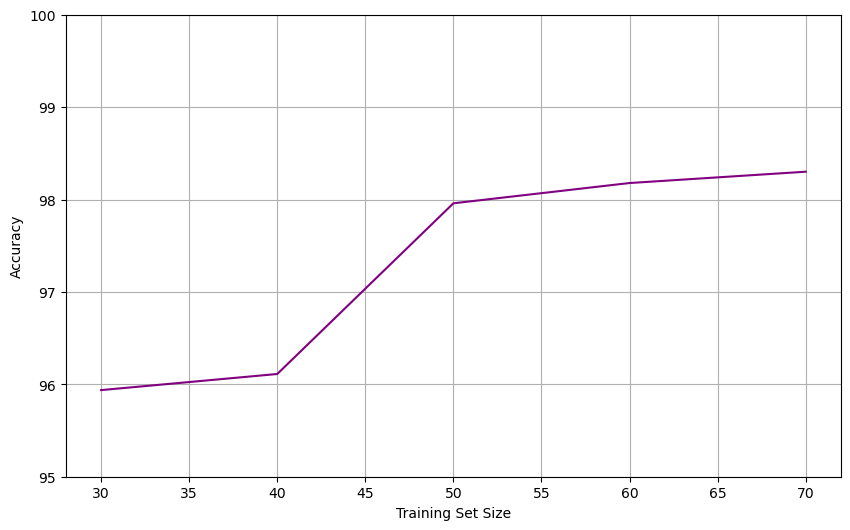

In [46]:
plot.plot(ratioArray, accuracyArray, color='purple')
plot.rcParams["figure.figsize"] = (10,6)
plot.grid()
plot.xlabel('Training Set Size')
plot.ylabel('Accuracy')
plot.ylim(95, 100)



Text(0, 0.5, 'Number of nodes')

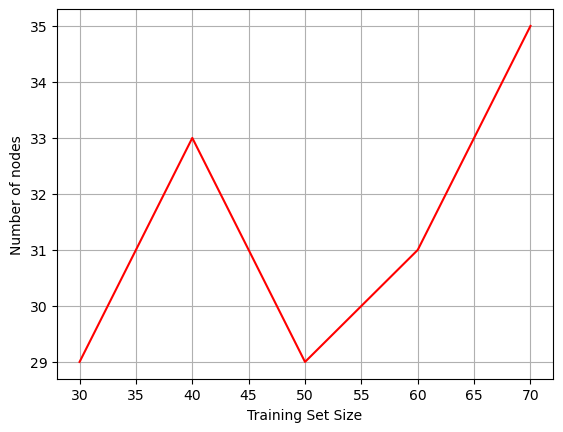

In [7]:
plot.plot(ratioArray, nodesArray, color='red')
plot.rcParams["figure.figsize"] = (10,6)
plot.grid()
plot.xlabel('Training Set Size')
plot.ylabel('Number of nodes')
